<a href="https://colab.research.google.com/github/lilymali03/proj/blob/main/CMSC320HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt





Mounted at /content/drive


In [3]:
plt.style.use('classic')
%matplotlib inline

from matplotlib import cycler
colors = cycler('color', ['#2b8cbe'])
plt.rc('axes', facecolor='#ece7f2', edgecolor='#3388BB', axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', facecolor='#ece7f2', edgecolor='#ece7f2')
plt.rc('figure', facecolor='w')

## **Question One**

Is there a correlation between an individual's political views and the political views of the adults the individual grew up around?

To clean the data, I removed the rows from Max and Fardina's classes in which students didn't provide answers about the political views of the adults they grew up around or about their own political views. I also removed the data where the student put "Don't know / It's complicated" for the adults' or their own political views.

Then, to make the data easier to analyze, I represented the different political views with numeric values. "Strongly conservative" became 0, "mildly conservative" became 1, "neutral" became 2, "mildly liberal" became 3, and "strongly liberal" became 4.

I also combined the two datasets, and then found the correlation coefficient for the two variables "Adults' Political View" and "Student's Political View".

In [4]:
fardina = pd.read_csv("fardina.csv")
max = pd.read_csv("max.csv")
max.columns = ['Time', 'Year', 'Age', 'AdultsPolitical', 'YourPolitical', 'Spirituality', 'Gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']
fardina.columns = ['Time', 'Year', 'Age', 'AdultsPolitical', 'YourPolitical', 'Spirituality', 'Gender', 'Compassion', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']
max = max.dropna(subset=['AdultsPolitical', 'YourPolitical'])
max = max[max['AdultsPolitical'] != "Don't know / It's complicated"]
max = max[max['YourPolitical'] != "Don't know / It's complicated"]
fardina = fardina.dropna(subset=['AdultsPolitical', 'YourPolitical'])
fardina = fardina[fardina['AdultsPolitical'] != "Don't know / It's complicated"]
fardina = fardina[fardina['YourPolitical'] != "Don't know / It's complicated"]
#print(max.head(10))

In [5]:
max = max.replace({'Strongly conservative': 0, 'Mildly conservative': 1, 'Neutral': 2, 'Mildly liberal': 3, 'Strongly liberal': 4}, regex=True)
#max.head(200)

In [6]:
fardina = fardina.replace({'Strongly conservative': 0, 'Mildly conservative': 1, 'Neutral': 2, 'Mildly liberal': 3, 'Strongly liberal': 4}, regex=True)
#fardina.head(200)

In [7]:
combined = pd.concat([max[['AdultsPolitical', 'YourPolitical']], fardina[['AdultsPolitical', 'YourPolitical']]])
combined['AdultsPolitical'] = combined['AdultsPolitical'].astype('int64')
combined['YourPolitical'] = combined['YourPolitical'].astype('int64')


#combined.head(300)



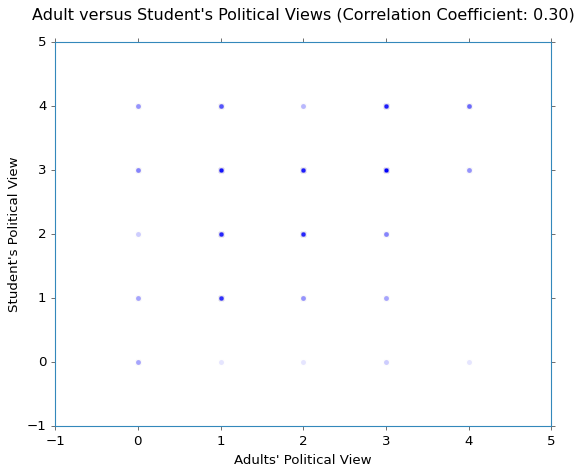

Pearson Correlation Coefficient (r): 0.30223559124374494


In [8]:
correlation_coefficient = combined['AdultsPolitical'].corr(combined['YourPolitical'])

plt.figure(figsize=(8, 6))
plt.axes(facecolor='w')
plt.scatter(combined['AdultsPolitical'], combined['YourPolitical'], alpha=0.1)
plt.xlabel("Adults' Political View")
plt.ylabel("Student's Political View")
plt.title(f"Adult versus Student's Political Views (Correlation Coefficient: {correlation_coefficient:.2f})", pad=20)
plt.grid(True)
plt.show()

print("Pearson Correlation Coefficient (r):" , correlation_coefficient)

The lighter dots represent data that occurs less within the dataset used, while darker dots represent data that occurs more frequently within the dataset used.

The correlation coefficient of 0.28 shows that there is a slight correlation between the adults' political views and the student's political views. Since 0.28 is positive, as the adults' political view becomes more liberal, the student's political view also becomes more liberal. However, 0.28 is not that strong of a correlation, which means that the linear relationship is not too strong.

## **Question Two**

In Fardina’s class, what is relationship between if a student thought they were compassionate and how they responded to the "Am I a jerk?" questions? Additionally, how does this compare to Max's class, where the students were not asked if they thought they were compassionate?

To clean the data, I removed the rows from Fardina's class in which students didn't provide answers about if they thought they were compassionate or to an "Am I a jerk?" question.

Then, to make the data easier to analyze, I represented the different opinions with numeric values. "Not a jerk" became 0, "mildly a jerk" became 1, and "strongly a jerk" became 2. I also added a column called "Average", where I computed the mean of how the student answered the fourteen "Am I a jerk" questions by summing up all of the numeric representations of the responses the student gave and dividing this sum by fourteen.

In [9]:
fardina = pd.read_csv("fardina.csv")
fardina.columns = ['Time', 'Year', 'Age', 'AdultsPolitical', 'YourPolitical', 'Spirituality', 'Gender', 'Compassion', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']
fardina = fardina.dropna(subset='Compassion')
fardina = fardina.dropna(subset=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14'])
#fardina.head(200)

In [10]:
fardina = fardina.replace({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2}, regex=True)
#fardina.head(200)

In [11]:
fardina['Average'] = fardina.loc[:,['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14']].mean(axis=1)
#fardina.head(200)

Text(0.5, 1.0, "Average Responses to 'Am I a jerk' Given By People Who Say They're Compassionate")

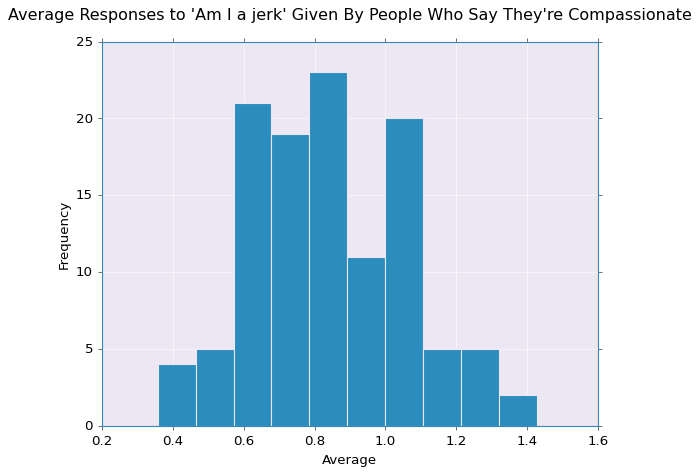

In [12]:
compassionate = fardina.loc[fardina["Compassion"] == 'Yes']
not_compassionate = fardina.loc[fardina["Compassion"] == 'No']
ax = compassionate["Average"].hist()
ax.set_xlabel("Average")
ax.set_ylabel("Frequency")
ax.set_title("Average Responses to 'Am I a jerk' Given By People Who Say They're Compassionate", pad=20)

(0.0, 4.5)

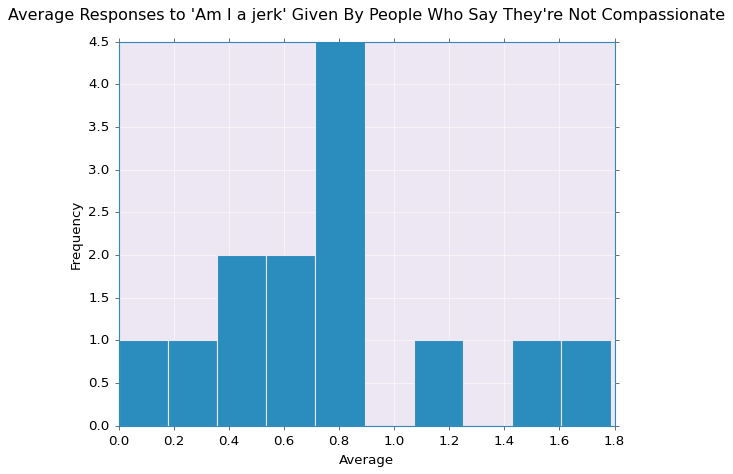

In [13]:
ax = not_compassionate["Average"].hist()
ax.set_xlabel("Average")
ax.set_ylabel("Frequency")
ax.set_title("Average Responses to 'Am I a jerk' Given By People Who Say They're Not Compassionate", pad=20)
ax.set_ylim(0, 4.5)

$N_0 = $ Whether or not an individual believes they are compassionate, and whether or not the individual believes others are jerks in certain scenarios, do not have a statistically significant association.

$N_A = $ There's a statistically significant association between whether or not an individual believes they are compassionate, and whether or not the individual believes others are jerks in certain scenarios

In [14]:
res = sp.stats.mannwhitneyu(compassionate['Average'], not_compassionate['Average'])
print(res)

MannwhitneyuResult(statistic=1198.0, pvalue=0.13290523700611553)


I used a Mann-Whitney Test because there are two samples, those who thought of themselves as compassionate and those who didn't. The histogram for people who didn't think of themselves as compassionate has gaps, so it does not represent a normal distribution. Using an alpha-value of 0.05, we will fail to reject the null hypothesis because of our p-value of 0.10, which is larger than 0.05. This means that we cannot conclude that there is a statistically significant association between whether or not an individual believes they are compassionate, and whether or not the individual believes others are jerks in certain scenarios.

Then, I cleaned the data representing Max's class by removing the rows in which students didn't provide an answer to an "Am I a jerk?" questions.

Then, to make the data easier to analyze, I represented the different opinions with numeric values. "Not a jerk" became 0, "mildly a jerk" became 1, and "strongly a jerk" became 2. I also added a column called "Average", where I computed the mean of how the student answered the fourteen "Am I a jerk" questions by summing up all of the numeric representations of the responses the student gave and dividing this sum by fourteen.

In [15]:
max = pd.read_csv("max.csv")
max.columns = ['Time', 'Year', 'Age', 'AdultsPolitical', 'YourPolitical', 'Spirituality', 'Gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']
max = max.dropna(subset=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14'])
#max.head(200)

In [16]:
max = max.replace({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2}, regex=True)
#max.head(200)

In [17]:
max['Average'] = max.loc[:,['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14']].mean(axis=1)
#max.head(200)

Text(0.5, 1.0, "Average Responses to 'Am I a jerk' Given By People Who Aren't Asked About Compassion")

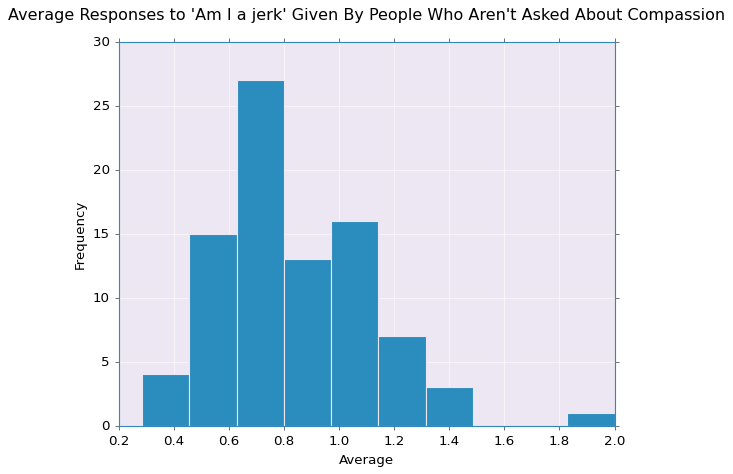

In [18]:
ax = max["Average"].hist()
ax.set_xlabel("Average")
ax.set_ylabel("Frequency")
ax.set_title("Average Responses to 'Am I a jerk' Given By People Who Aren't Asked About Compassion", pad=20)

$N_0 = $ Whether or not an individual believes they are compassionate or is asked about their compassion, and whether or not the individual believes others are jerks in certain scenarios, do not have a statistically significant association.

$N_A = $ There's a statistically significant association between whether or not an individual believes they are compassionate or is asked about their compassion, and whether or not the individual believes others are jerks in certain scenarios

In [19]:
res = sp.stats.kruskal(compassionate['Average'], not_compassionate['Average'], max['Average'])
print(res)

KruskalResult(statistic=2.328502938855126, pvalue=0.3121562330880463)


I used a Kruskal-Wallis Test because there are more than two samples, those who thought of themselves as compassionate, those who didn't, and those who weren't asked if they thought of themselves as compassionate. The histogram for people who didn't think of themselves as compassionate has gaps, so it does not represent a normal distribution. Although there is a slight gap in the histogram representing those who weren't asked about compassion, there aren't major outliers within any of the data.

Using an alpha-value of 0.05, we will fail to reject the null hypothesis because of our p-value of 0.24, which is larger than 0.05. This means that we cannot conclude that there is a statistically significant association between whether or not an individual believes they are compassionate or is asked about their compassion, and whether or not the individual believes others are jerks in certain scenarios.

## **Question Three**

Some of the "Am I a jerk?" questions involve questions relating to pregnancy decisions and wedding planning. Is there a relationship between gender and these types of questions?

I thought that some of the questions that might cause the greatest divide in opinions between people who identify as different genders were the following three questions:


*   "My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?"
*   "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"
*   "My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?"

To clean the data, I removed the rows from Max and Fardina's classes in which students didn't provide answers about their gender. Sometimes, "Female" was spelled as "Famale", so I replaced all of the incorrect spellings with the correct spelling of the word. I also removed the data where the student answered the question with "Prefer not to say".

I also removed the rows in which students didn't provide answers about to one of the three "Am I a jerk?" questions listed above.

Then, to make the data easier to analyze, I represented the different opinions with numeric values. "Not a jerk" became 0, "mildly a jerk" became 1, and "strongly a jerk" became 2. I also added a column called "Average", where I computed the mean of how the student answered the three "Am I a jerk" questions listed above by summing up all of the numeric representations of the responses the student gave and dividing this sum by three.

I also combined the two datasets.

In [20]:
fardina = pd.read_csv("fardina.csv")
fardina.columns = ['Time', 'Year', 'Age', 'AdultsPolitical', 'YourPolitical', 'Spirituality', 'Gender', 'Compassion', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']
fardina = fardina.dropna(subset='Gender')
fardina = fardina.dropna(subset=['Q2', 'Q13', 'Q14'])
max = pd.read_csv("max.csv")
max.columns = ['Time', 'Year', 'Age', 'AdultsPolitical', 'YourPolitical', 'Spirituality', 'Gender', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14']
max = max.dropna(subset='Gender')
max = max.dropna(subset=['Q2', 'Q13', 'Q14'])

In [21]:
fardina = fardina.replace({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2}, regex=True)
max = max.replace({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2}, regex=True)

In [22]:
fardina['Average'] = fardina.loc[:,['Q2','Q13','Q14']].mean(axis=1)
max['Average'] = max.loc[:,['Q2','Q13','Q14']].mean(axis=1)

In [23]:
combined = pd.concat([max[['Gender', 'Average']], fardina[['Gender', 'Average']]])
combined = combined.replace({'Famale': 'Female'}, regex=True)
combined = combined[combined['Gender'] != 'Prefer not to say']


#combined.head(20)

In [24]:
female = combined.loc[combined["Gender"] == 'Female']
male = combined.loc[combined["Gender"] == 'Male']
other = combined.loc[combined["Gender"] == 'Non-binary / other']
#print(other.head(10))

Text(0.5, 1.0, 'Average Response to the Three Questions for Those Who Identify as Female')

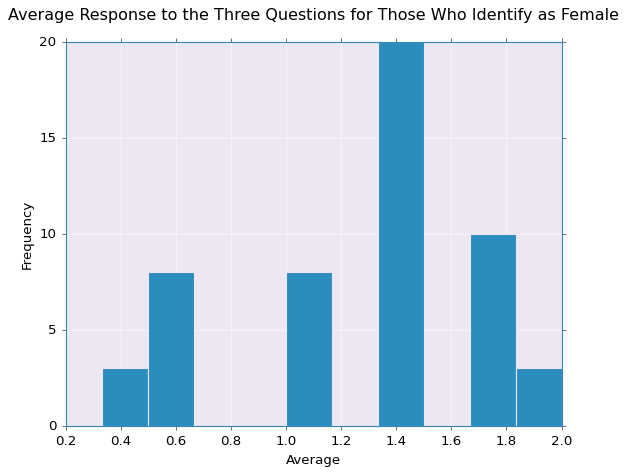

In [25]:
ax = female["Average"].hist()
ax.set_xlabel("Average")
ax.set_ylabel("Frequency")
ax.set_title("Average Response to the Three Questions for Those Who Identify as Female", pad=20)
#ax.set_xlim(0, 2)

Text(0.5, 1.0, 'Average Response to the Three Questions for Those Who Identify as Male')

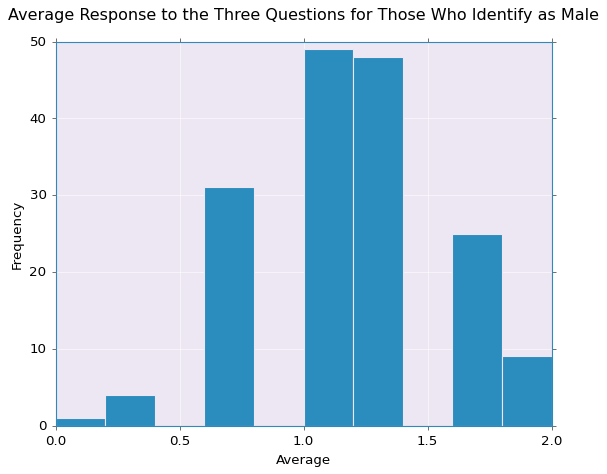

In [26]:
ax = male["Average"].hist()
ax.set_xlabel("Average")
ax.set_ylabel("Frequency")
ax.set_title("Average Response to the Three Questions for Those Who Identify as Male", pad=20)

(0.0, 2.25)

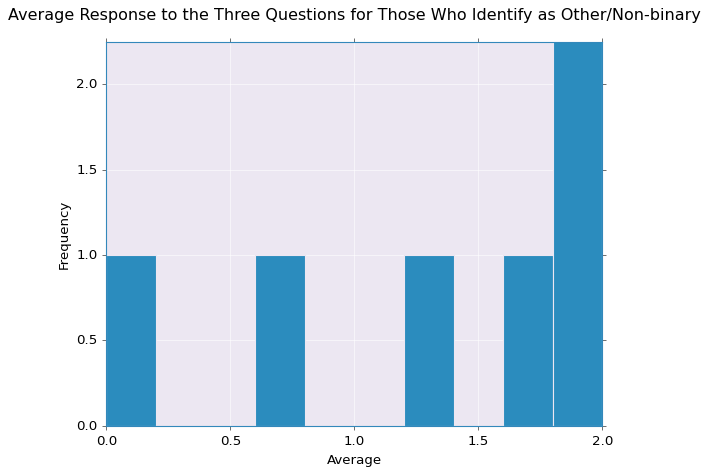

In [27]:
ax = other["Average"].hist()
ax.set_xlabel("Average")
ax.set_ylabel("Frequency")
ax.set_title("Average Response to the Three Questions for Those Who Identify as Other/Non-binary", pad=20)
ax.set_ylim(0, 2.25)

$N_0 = $ The gender an individual identifies with and whether or not they think somebody in the three scenarios above is a jerk do not have a statistically significant association.

$N_A = $ There's a statistically significant association between the gender an individual identifies with and whether or not they think somebody in the three scenarios above is a jerk.

In [28]:
res = sp.stats.kruskal(female['Average'], male['Average'], other['Average'])
print(res)

KruskalResult(statistic=3.1151910113216195, pvalue=0.21064195014222004)


I used a Kruskal-Wallis Test because there are more than two samples, those who identified as female, those who identified as male, and those who identified as other/non-binary. All three histograms have gaps, so they do not have normal distributions. None of the histograms have outliers.

Using an alpha-value of 0.05, we will fail to reject the null hypothesis because of our p-value of 0.27, which is larger than 0.05. This means that we cannot conclude that there is a statistically significant association between the gender somebody identifies with and whether or not they think somebody in the three scenarios above is a jerk.

Afterwards, I compared the distributions for those who identify as female and those who identify as male.

$N_0 = $ Identifying as female or male, and whether or not the individual thinks someone in the three scenarios above is a jerk, do not have a statistically significant association.

$N_A = $ There's a statistically significant association between identifying as female or male, and whether or not the individual believes somebody in the three scenarios above is a jerk.

In [29]:
res = sp.stats.mannwhitneyu(female['Average'], male['Average'])
print(res)

MannwhitneyuResult(statistic=4779.5, pvalue=0.25927030055438227)


I used a Mann-Whitney Test because there are two samples. Neither of the histograms have normal distributions.

Using an alpha-value of 0.05, we will fail to reject the null hypothesis because of our p-value of 0.16, which is larger than 0.05. This means that we cannot conclude that there is a statistically significant association between identifying as male or female and whether or not the individual thinks somebody in the three scenarios above is a jerk.

In [30]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [31]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My\ Drive/Colab\ Notebooks/CMSC320HW4.ipynb ./
!jupyter nbconvert --to PDF "CMSC320HW4.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook CMSC320HW4.ipynb to PDF
[NbConvertApp] Support files will be in CMSC320HW4_files/
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Making directory ./CMSC320HW4_files
[NbConvertApp] Writing 101354 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 211000 bytes to CMSC320HW